In [ ]:
import sys
print(sys.version)



3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
!pip install scikit-learn==0.24.2



In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import  silhouette_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')


import sys

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize, precision=3)
sns.set(style="darkgrid")

plt.rcParams.update({
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})


In [ ]:
# Load the dataset into a pandas DataFrame
Cred = pd.read_csv("/content/Credit Card_Clustering.csv")

In [ ]:
Cred.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
Cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Calculate and display the total number of missing values in the DataFrame
total_missing = Cred.isnull().sum().sum()
print("\nTotal missing values:", total_missing)

# Calculate and display the number of unique values in each column of the DataFrame
unique_values = Cred.nunique()
print("\nNumber of unique values per column:\n", unique_values)



Total missing values: 314

Number of unique values per column:
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [ ]:
Cred.shape

(8950, 18)

In [ ]:
Cred.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
Cred.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
# Replace missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with the median of each column
Cred['CREDIT_LIMIT'].fillna(Cred['CREDIT_LIMIT'].median(), inplace=True)

# Verify the count after filling missing values in 'CREDIT_LIMIT'
credit_limit_count = Cred['CREDIT_LIMIT'].count()

# Fill missing values in 'MINIMUM_PAYMENTS' with its median value
min_payments_median = Cred['MINIMUM_PAYMENTS'].median()
Cred['MINIMUM_PAYMENTS'].fillna(min_payments_median, inplace=True)


In [ ]:
Cred.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
Cred['Monthly_avg_purchase']=Cred['PURCHASES']/Cred['TENURE']

In [ ]:
print(Cred['Monthly_avg_purchase'].head(),'\n ',
Cred['TENURE'].head(),'\n', Cred['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


In [ ]:
Cred['Monthly_cash_advance']=Cred['CASH_ADVANCE']/Cred['TENURE']

In [ ]:
Cred[Cred['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

In [ ]:
Cred.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

In [ ]:
Cred[(Cred['ONEOFF_PURCHASES']==0) & (Cred['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [ ]:
Cred[(Cred['ONEOFF_PURCHASES']>0) & (Cred['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [ ]:
Cred[(Cred['ONEOFF_PURCHASES']>0) & (Cred['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [ ]:
Cred[(Cred['ONEOFF_PURCHASES']==0) & (Cred['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [ ]:
def purchase(Cred):
    if (Cred['ONEOFF_PURCHASES'] == 0) & (Cred['INSTALLMENTS_PURCHASES'] == 0):
        return 'none'
    elif (Cred['ONEOFF_PURCHASES'] > 0) & (Cred['INSTALLMENTS_PURCHASES'] > 0):
        return 'both_oneoff_installment'
    elif (Cred['ONEOFF_PURCHASES'] > 0) & (Cred['INSTALLMENTS_PURCHASES'] == 0):
        return 'one_off'
    elif (Cred['ONEOFF_PURCHASES'] == 0) & (Cred['INSTALLMENTS_PURCHASES'] > 0):
        return 'installment'


In [ ]:
Cred['purchase_type']=Cred.apply(purchase,axis=1)

In [ ]:
Cred['purchase_type'].value_counts()

purchase_type
both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: count, dtype: int64

In [ ]:
Cred['limit_usage']=Cred.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [ ]:
Cred['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [ ]:
Cred['PAYMENTS'].isnull().any()
Cred['MINIMUM_PAYMENTS'].isnull().value_counts()

MINIMUM_PAYMENTS
False    8950
Name: count, dtype: int64

In [ ]:
Cred['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
Cred['payment_minpay']=Cred.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [ ]:
Cred['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

In [ ]:
# Applying log transformation to the data
cred_log = Cred.drop(columns=['CUST_ID', 'purchase_type']).applymap(lambda x: np.log1p(x))

In [ ]:
cred_log.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      6.161637           0.619940     4.899647          3.204274   
std       2.013303           0.148590     2.916872          3.246365   
min       0.000000           0.000000     0.000000          0.000000   
25%       4.861995           0.635989     3.704627          0.000000   
50%       6.773521           0.693147     5.892417          3.663562   
75%       7.628099           0.693147     7.013133          6.360274   
max       9.854515           0.693147    10.800403         10.615512   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 3.352403      3.319086             0.361268   
std                  3.082973      3.566298             0.277317   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  4.499810      0.000000             0.405465   
75%                  6.151961      7.016449             0.650588   
max                 10.021315     10.760839             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.158699                          0.270072   
std                      0.216672                          0.281852   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.154151   
75%                      0.262364                          0.559616   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.113512          0.817570       1.894731      8.094825   
std                  0.156716          1.009316       1.373856      0.819629   
min                  0.000000          0.000000       0.000000      3.931826   
25%                  0.000000          0.000000       0.693147      7.378384   
50%                  0.000000          0.000000       2.079442      8.006701   
75%                  0.200671          1.609438       2.890372      8.779711   
max                  0.916291          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count  8950.000000       8950.000000       8950.000000  8950.000000   
mean      6.624540          5.916079          0.117730     2.519680   
std       1.591763          1.169929          0.211617     0.130367   
min       0.000000          0.018982          0.000000     1.945910   
25%       5.951361          5.146667          0.000000     2.564949   
50%       6.754489          5.747301          0.000000     2.564949   
75%       7.550732          6.671670          0.133531     2.564949   
max      10.834125         11.243832          0.693147     2.564949   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000           8950.000000  8950.000000     8950.000000  
mean               3.050877              2.163970     0.296081        1.357600  
std                2.002823              2.429741     0.250303        0.940149  
min                0.000000              0.000000     0.000000        0.000000  
25%                1.481458              0.000000     0.040656        0.648817  
50%                3.494587              0.000000     0.264455        1.109459  
75%                4.587295              4.606022     0.540911        1.953415  
max                8.315721              8.276166     2.827902        8.830767

In [ ]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cred_pre=cred_log[[x for x in cred_log.columns if x not in col ]]

In [ ]:
cred_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [ ]:
cred_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [ ]:
x=Cred.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.237, 13.259, 10.087,  5.571])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

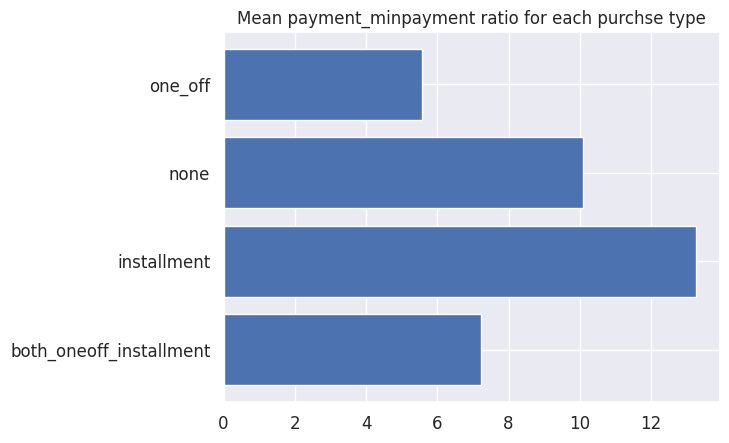

In [ ]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


In [ ]:
Cred.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   8950.000000       8950.000000       8950.000000  8950.000000   
mean    1733.143852        844.906767          0.153715    11.517318   
std     2895.063757       2332.792322          0.292499     1.338331   
min        0.000000          0.019163          0.000000     6.000000   
25%      383.276166        170.857654          0.000000    12.000000   
50%      856.901546        312.343947          0.000000    12.000000   
75%     1901.134317        788.713501          0.142857    12.000000   
max    50721.483360      76406.207520          1.000000    12.000000   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000           8950.000000  8950.000000     8950.000000  
mean              86.175173             88.977984     0.388884        9.059164  
std              180.508787            193.136115     0.389722      118.180526  
min                0.000000              0.000000     0.000000        0.000000  
25%                3.399375              0.000000     0.041494        0.913275  
50%               31.936667              0.000000     0.302720        2.032717  
75%               97.228333             99.085196     0.717571        6.052729  
max             4086.630833           3928.100980    15.909951     6840.52

In [ ]:
Cred[Cred['purchase_type']=='n']

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, Monthly_avg_purchase, Monthly_cash_advance, purchase_type, limit_usage, payment_minpay]
Index: []

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

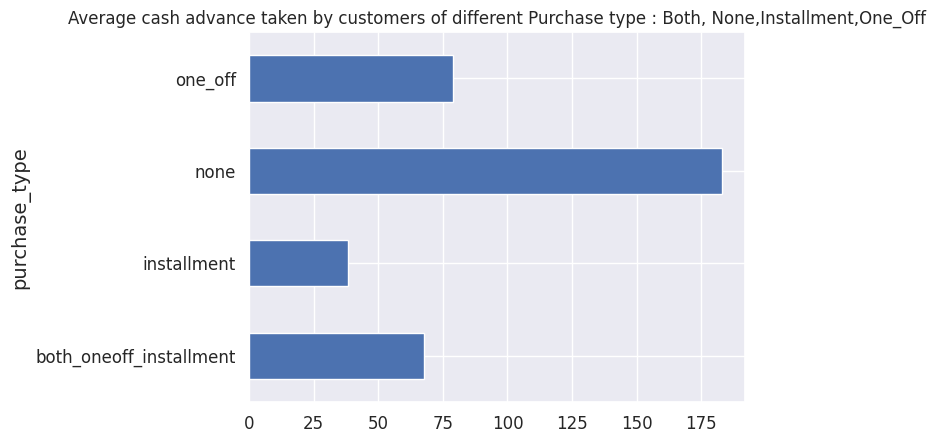

In [ ]:
Cred.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

<Axes: ylabel='purchase_type'>

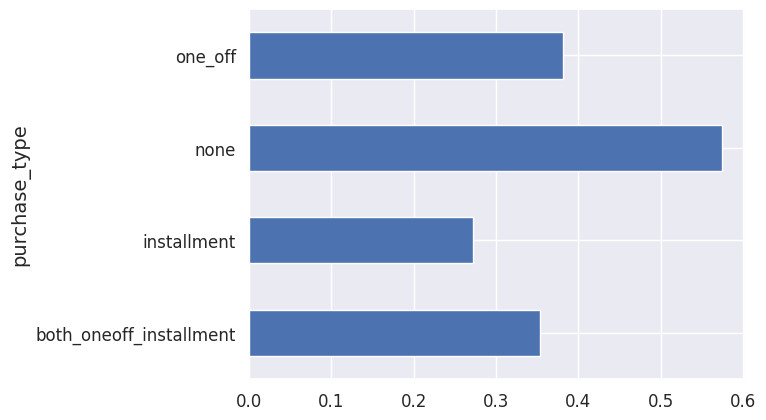

In [ ]:
Cred.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [ ]:
cred_original=pd.concat([Cred,pd.get_dummies(Cred['purchase_type'])],axis=1)

In [ ]:
# Generate dummy variables for the 'purchase_type' categorical column
cred_pre['purchase_type'] = Cred['purchase_type']
purchase_type_dummies = pd.get_dummies(cred_pre['purchase_type'])

# Display the dummy variables
print(purchase_type_dummies)


      both_oneoff_installment  installment   none  one_off
0                       False         True  False    False
1                       False        False   True    False
2                       False        False  False     True
3                       False        False  False     True
4                       False        False  False     True
...                       ...          ...    ...      ...
8945                    False         True  False    False
8946                    False         True  False    False
8947                    False         True  False    False
8948                    False        False   True    False
8949                    False        False  False     True

[8950 rows x 4 columns]


In [ ]:
cred_dummy=pd.concat([cred_pre,pd.get_dummies(cred_pre['purchase_type'])],axis=1)

In [ ]:
l=['purchase_type']

In [ ]:
cred_dummy=cred_dummy.drop(l,axis=1)
cred_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [ ]:
cred_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [ ]:
cred_dummy.head(3)

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.597837          0.000000                4.568506   
1           0.646627          0.000000                0.000000   
2           0.693147          6.651791                0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.154151                    0.000000   
1             0.000000                    0.000000   
2             0.693147                    0.693147   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.080042                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0       1.098612              2.191654              0.000000     0.040086   
1       0.000000              0.000000              6.287695     0.376719   
2       2.564949              4.180994              0.000000     0.287197   

   payment_minpay  both_oneoff_installment  installment   none  one_off  
0        0.894662                    False         True  False    False  
1        1.574068                    False        False   True    False  
2        0.688979                    False        False  False     True

<Axes: >

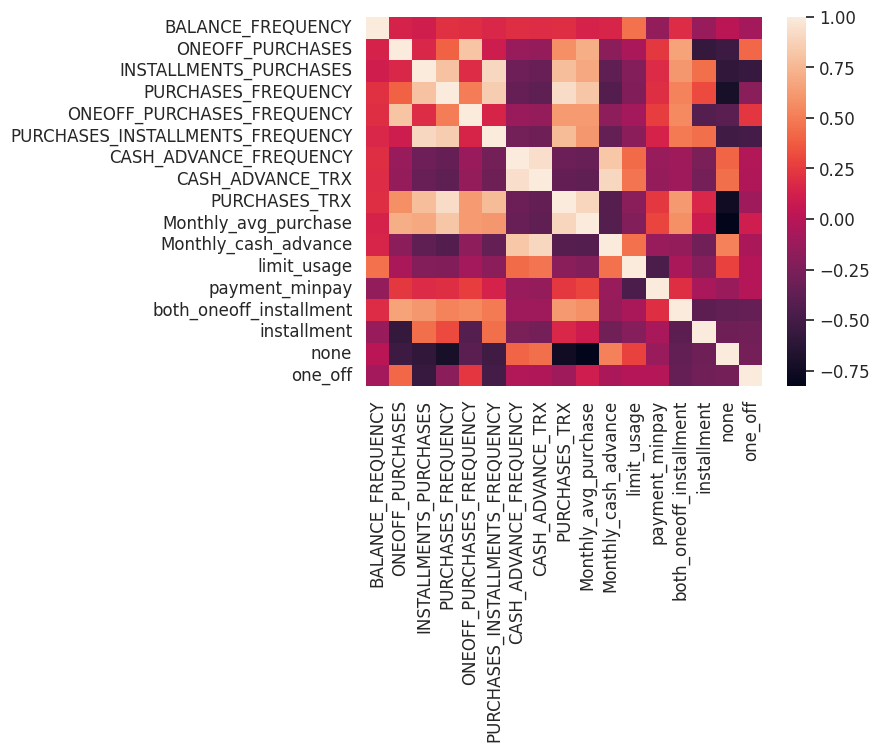

In [ ]:
sns.heatmap(cred_dummy.corr())

In [ ]:
sc=StandardScaler()

In [ ]:
cred_dummy.shape

(8950, 17)

In [ ]:
cred_scaled=sc.fit_transform(cred_dummy)

In [ ]:
cred_scaled

array([[-1.488e-01, -9.871e-01,  3.945e-01, -7.469e-01, -7.325e-01,
        -6.743e-01, -7.244e-01, -8.101e-01, -5.795e-01, -4.290e-01,
        -8.907e-01, -1.023e+00, -4.924e-01, -6.702e-01,  1.721e+00,
        -5.437e-01, -5.146e-01],
       [ 1.796e-01, -9.871e-01, -1.087e+00, -1.303e+00, -7.325e-01,
        -9.583e-01,  6.996e-01,  7.846e-01, -1.379e+00, -1.523e+00,
         1.697e+00,  3.222e-01,  2.303e-01, -6.702e-01, -5.812e-01,
         1.839e+00, -5.146e-01],
       [ 4.927e-01,  1.062e+00, -1.087e+00,  1.197e+00,  2.467e+00,
        -9.583e-01, -7.244e-01, -8.101e-01,  4.879e-01,  5.643e-01,
        -8.907e-01, -3.550e-02, -7.112e-01, -6.702e-01, -5.812e-01,
        -5.437e-01,  1.943e+00],
       [-8.579e-01,  1.266e+00, -1.087e+00, -1.014e+00, -3.630e-01,
        -9.583e-01, -2.136e-01, -1.233e-01, -8.747e-01,  8.912e-01,
         3.024e-01, -3.812e-01, -1.444e+00, -6.702e-01, -5.812e-01,
        -5.437e-01,  1.943e+00],
       [ 4.927e-01, -1.143e-01, -1.087e+00, -1.014e+

In [ ]:
cred_dummy.shape

(8950, 17)

In [ ]:
# Since we have 17 features, we will set n_components to 17.
pc=PCA(n_components=17)
cred_pca=pc.fit(cred_scaled)

In [ ]:
# Calculate the total variance explained by 17 principal components
total_variance_17 = sum(cred_pca.explained_variance_ratio_)

# Display the total variance explained
total_variance_17

1.0

In [ ]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cred_pca=pc.fit(cred_scaled)
    var_ratio[n]=sum(cred_pca.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.5826439793960279,
 3: 0.7299379309512704,
 4: 0.8115442762351257,
 5: 0.8770555795291435,
 6: 0.918649244351262,
 7: 0.9410925256030142,
 8: 0.961611405368306,
 9: 0.9739787081990641,
 10: 0.9835896584630706,
 11: 0.9897248107341959,
 12: 0.992755000913523,
 13: 0.9953907562385425,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

In [ ]:
pc=PCA(n_components=6)

In [ ]:
p=pc.fit(cred_scaled)

In [ ]:
cred_scaled.shape

(8950, 17)

In [ ]:
p.explained_variance_

array([6.836, 3.07 , 2.504, 1.387, 1.114, 0.707])

In [ ]:
np.sum(p.explained_variance_)

15.618782269308781

In [ ]:
var_ratio

{2: 0.5826439793960279,
 3: 0.7299379309512704,
 4: 0.8115442762351257,
 5: 0.8770555795291435,
 6: 0.918649244351262,
 7: 0.9410925256030142,
 8: 0.961611405368306,
 9: 0.9739787081990641,
 10: 0.9835896584630706,
 11: 0.9897248107341959,
 12: 0.992755000913523,
 13: 0.9953907562385425,
 14: 0.9979616898169594,
 15: 0.9996360473172955,
 16: 1.0,
 17: 1.0}

<Axes: >

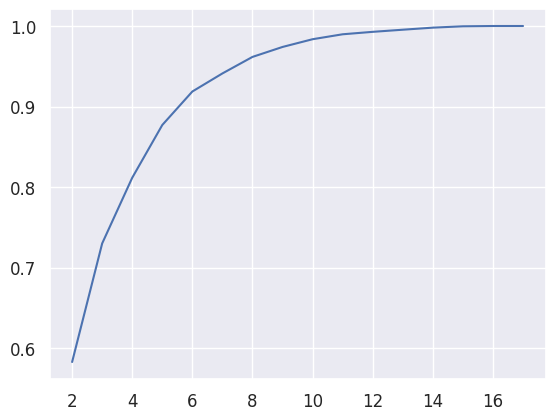

In [ ]:
pd.Series(var_ratio).plot()

In [ ]:
cred_scaled.shape

(8950, 17)

In [ ]:
pc_final=PCA(n_components=6).fit(cred_scaled)

reduced_cred=pc_final.fit_transform(cred_scaled)

In [ ]:
dd=pd.DataFrame(reduced_cred)

In [ ]:
dd.head()

0         1         2         3         4         5
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214

In [ ]:
dd.shape

(8950, 6)

In [ ]:
col_list=cred_dummy.columns

In [ ]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [ ]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                 0.029707  0.240072 -0.263140 -0.353549   
ONEOFF_PURCHASES                  0.214107  0.406078  0.239165  0.001520   
INSTALLMENTS_PURCHASES            0.312051 -0.098404 -0.315625  0.087983   
PURCHASES_FREQUENCY               0.345823  0.015813 -0.162843 -0.074617   
ONEOFF_PURCHASES_FREQUENCY        0.214702  0.362208  0.163222  0.036303   
PURCHASES_INSTALLMENTS_FREQUENCY  0.295451 -0.112002 -0.330029  0.023502   
CASH_ADVANCE_FREQUENCY           -0.214336  0.286074 -0.278586  0.096353   
CASH_ADVANCE_TRX                 -0.229393  0.291556 -0.285089  0.103484   
PURCHASES_TRX                     0.355503  0.106625 -0.102743 -0.054296   
Monthly_avg_purchase              0.345992  0.141635  0.023986 -0.079373   
Monthly_cash_advance             -0.243861  0.264318 -0.257427  0.135292   
limit_usage                      -0.146302  0.235710 -0.251278 -0.431682   
payment_minpay                    0.119632  0.021328  0.136357  0.591561   
both_oneoff_installment           0.241392  0.273676 -0.131935  0.254710   
installment                       0.082209 -0.443375 -0.208683 -0.190829   
none                             -0.310283 -0.005214 -0.096911  0.245104   
one_off                          -0.042138  0.167737  0.472749 -0.338549   

                                      PC_4      PC_5  
BALANCE_FREQUENCY                -0.228681 -0.693816  
ONEOFF_PURCHASES                 -0.023197  0.129094  
INSTALLMENTS_PURCHASES           -0.002181  0.115223  
PURCHASES_FREQUENCY               0.115948 -0.081879  
ONEOFF_PURCHASES_FREQUENCY       -0.051279 -0.097299  
PURCHASES_INSTALLMENTS_FREQUENCY  0.025871  0.006731  
CASH_ADVANCE_FREQUENCY            0.360132  0.066589  
CASH_ADVANCE_TRX                  0.332753  0.082307  
PURCHASES_TRX                     0.104971 -0.009402  
Monthly_avg_purchase              0.194147  0.015878  
Monthly_cash_advance              0.268026  0.058258  
limit_usage                      -0.181885  0.024298  
payment_minpay                    0.215446 -0.572467  
both_oneoff_installment          -0.340849  0.294708  
installment                       0.353821 -0.086087  
none                             -0.342222 -0.176809  
one_off                           0.362585 -0.060698

In [ ]:
# Factor Analysis : variance explained by each component-
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

In [ ]:
km_4=KMeans(n_clusters=4,random_state=123)

In [ ]:
km_4.fit(reduced_cred)

KMeans(n_clusters=4, random_state=123)

In [ ]:
km_4.labels_

array([2, 1, 0, 0, 0, 2, 3, 2, 3, 0, 2, 0, 3, 3, 1, 2, 1, 2, 3, 2, 2, 3,
       2, 3, 1, 2, 0, 2, 3, 2, 3, 3, 0, 0, 2, 1, 1, 3, 0, 0, 1, 3, 0, 1,
       3, 3, 2, 1, 3, 0, 3, 3, 1, 0, 2, 0, 0, 3, 1, 2, 0, 0, 1, 0, 2, 3,
       1, 1, 3, 0, 2, 3, 1, 3, 3, 3, 0, 2, 1, 0, 3, 1, 3, 2, 3, 0, 3, 3,
       0, 1, 3, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 1, 3, 3,
       3, 1, 3, 1, 3, 3, 2, 1, 2, 1, 3, 0, 2, 1, 1, 0, 1, 3, 0, 1, 0, 3,
       2, 0, 2, 3, 3, 3, 3, 0, 3, 1, 1, 3, 3, 0, 2, 0, 3, 3, 2, 3, 2, 3,
       3, 2, 3, 1, 3, 0, 1, 1, 3, 3, 2, 1, 2, 3, 2, 3, 1, 3, 2, 1, 3, 1,
       0, 1, 3, 2, 3, 2, 1, 0, 3, 2, 2, 3, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 3, 2, 0, 3, 3, 3, 3, 3, 1, 0, 2, 2, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 0, 3, 3, 1, 3, 3, 2, 0, 0, 3, 0, 2, 3, 2, 3, 0, 3,
       3, 0, 3, 2, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 3, 2, 1, 0, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 2, 3, 3, 2, 3, 3, 1, 1,
       1, 3, 0, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0, 0, 0,

In [ ]:
pd.Series(km_4.labels_).value_counts()

3    2769
2    2224
1    2088
0    1869
Name: count, dtype: int64

In [ ]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cred )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

num_clusters  cluster_errors
0              1   139772.482528
1              2    93307.834489
2              3    70747.695551
3              4    49446.066485
4              5    42548.525149
5              6    37713.045270
6              7    34124.576845
7              8    31164.917172
8              9    28866.569555
9             10    26568.918038
10            11    24020.035876
11            12    22363.878339
12            13    21006.926374
13            14    19875.767022
14            15    18729.427160
15            16    18044.027929
16            17    17396.237218
17            18    16952.830421
18            19    16276.110697
19            20    15816.923416

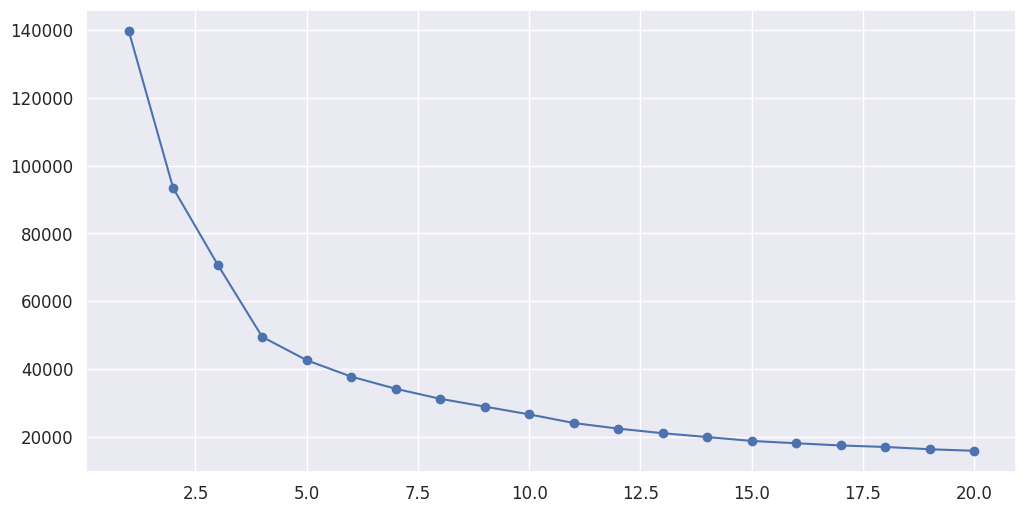

In [ ]:
# Allow plots to appear in the notebook
%matplotlib inline

# Import the necessary libraries
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the clusters data
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker="o")


In [ ]:
# Calculate silhouette scores for different values of k ranging from 2 to 20
k_values = range(2, 21)
scores = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    kmeans_model.fit(reduced_cred)
    scores.append(metrics.silhouette_score(reduced_cred, kmeans_model.labels_))


In [ ]:
scores

[0.3319452179234264,
 0.35401650944838775,
 0.43708577439659474,
 0.4312114520971776,
 0.4228144914653744,
 0.4025842876275969,
 0.4144537298622616,
 0.388928796212345,
 0.39299913554746213,
 0.3678798374268568,
 0.3669766371659528,
 0.34010431910388955,
 0.35271636570412507,
 0.343964162296631,
 0.33369567078514206,
 0.3222956561386571,
 0.33227439186998314,
 0.3272950756025998,
 0.3239792346891927]

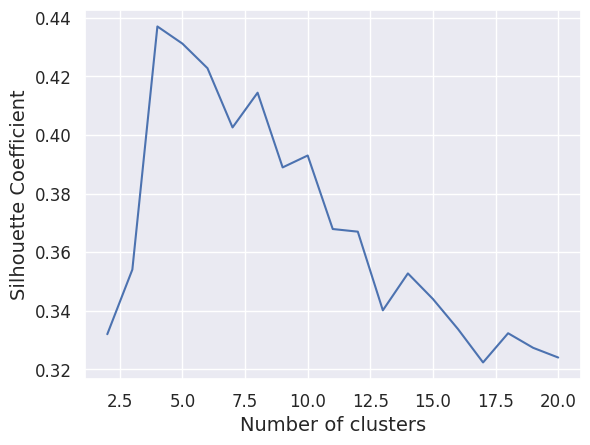

In [ ]:
plt.plot(k_values, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

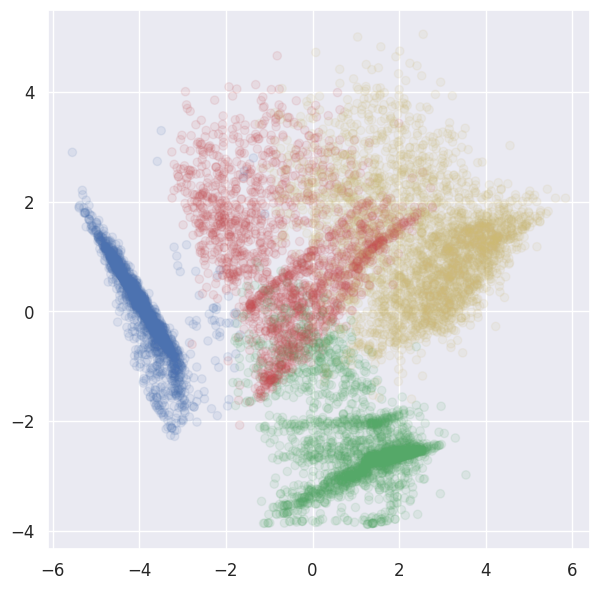

In [ ]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cred[:,0],reduced_cred[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [ ]:
df_pair_plot=pd.DataFrame(reduced_cred,columns=['PC_' +str(i) for i in range(6)])

In [ ]:
df_pair_plot['Cluster']=km_4.labels_

In [ ]:
df_pair_plot.head()

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5  Cluster
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755        2
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463        1
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932        0
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986        0
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214        0

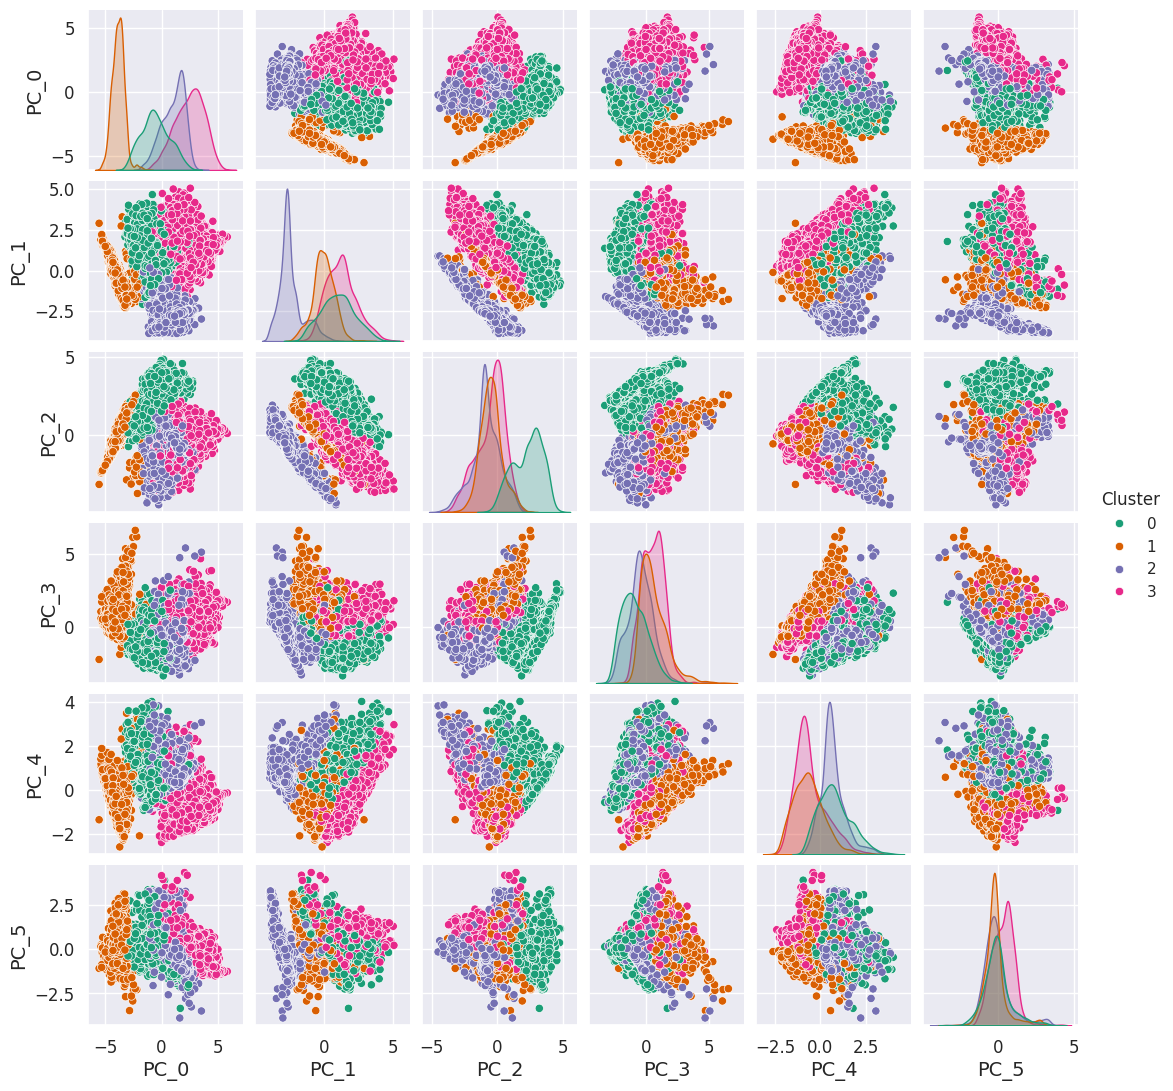

In [ ]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
# Selecting key performance variables for deriving new KPIs
selected_variables = [
    'PURCHASES_TRX',
    'Monthly_avg_purchase',
    'Monthly_cash_advance',
    'limit_usage',
    'CASH_ADVANCE_TRX',
    'payment_minpay',
    'both_oneoff_installment',
    'installment',
    'one_off',
    'none',
    'CREDIT_LIMIT'
]


In [ ]:
cred_pre.describe()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       CASH_ADVANCE_TRX  PURCHASES_TRX  Monthly_avg_purchase  \
count       8950.000000    8950.000000           8950.000000   
mean           0.817570       1.894731              3.050877   
std            1.009316       1.373856              2.002823   
min            0.000000       0.000000              0.000000   
25%            0.000000       0.693147              1.481458   
50%            0.000000       2.079442              3.494587   
75%            1.609438       2.890372              4.587295   
max            4.820282       5.883322              8.315721   

       Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000  8950.000000     8950.000000  
mean               2.163970     0.296081        1.357600  
std                2.429741     0.250303        0.940149  
min                0.000000     0.000000        0.000000  
25%                0.000000     0.040656        0.648817  
50%                0.000000     0.264455        1.109459  
75%                4.606022     0.540911        1.953415  
max                8.276166     2.827902        8.830767

In [ ]:
# Concatenate labels obtained from KMeans with the original data
cluster_df_4 = pd.concat([cred_original[selected_variables], pd.Series(km_4.labels_, name='Cluster_4')], axis=1)


In [ ]:
cluster_df_4.head()

PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0              2              7.950000              0.000000     0.040901   
1              0              0.000000            536.912124     0.457495   
2             12             64.430833              0.000000     0.332687   
3              1            124.916667             17.149001     0.222223   
4              1              1.333333              0.000000     0.681429   

   CASH_ADVANCE_TRX  payment_minpay  both_oneoff_installment  installment  \
0                 0        1.446508                    False         True   
1                 4        3.826241                    False        False   
2                 0        0.991682                    False        False   
3                 1        0.000000                    False        False   
4                 0        2.771075                    False        False   

   one_off   none  CREDIT_LIMIT  Cluster_4  
0    False  False        1000.0          2  
1    False   True        7000.0          1  
2     True  False        7500.0          0  
3     True  False        7500.0          0  
4     True  False        1200.0          0

In [ ]:
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[selected_variables].mean()).T
cluster_4

Cluster_4                          0            1            2            3
PURCHASES_TRX               7.127341     0.043582    12.062050    33.013723
Monthly_avg_purchase       69.875917     0.148297    47.626256   193.008043
Monthly_cash_advance       78.098613   186.281319    33.550080    67.466910
limit_usage                 0.379761     0.576076     0.264745     0.353591
CASH_ADVANCE_TRX            2.881220     6.540230     1.021133     2.804261
payment_minpay              5.573672     9.936617    13.422420     7.245651
both_oneoff_installment     0.000535     0.001916     0.000000     1.000000
installment                 0.000000     0.017241     1.000000     0.000000
one_off                     0.999465     0.002874     0.000000     0.000000
none                        0.000000     0.977969     0.000000     0.000000
CREDIT_LIMIT             4519.708481  4055.156450  3338.270406  5736.732730

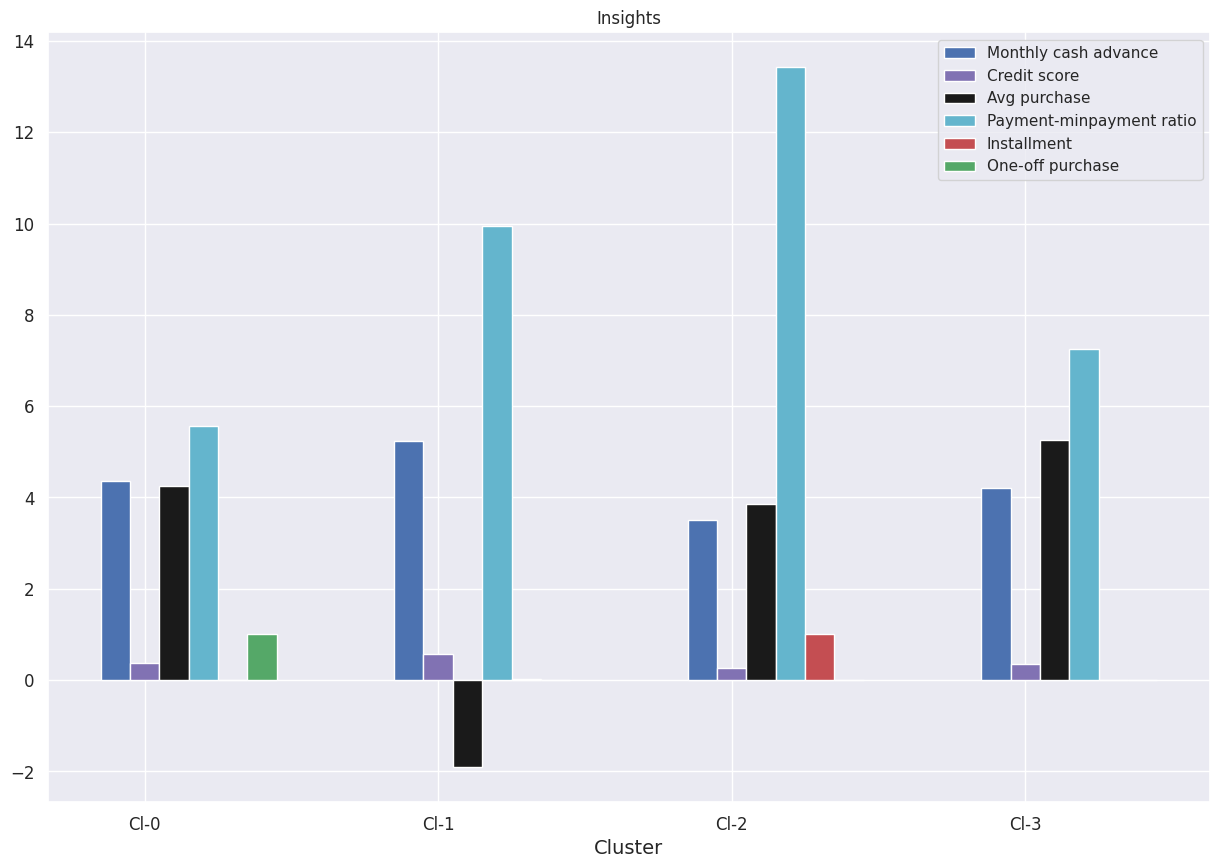

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

index = np.arange(len(cluster_4.columns))
cash_advance = np.log(cluster_4.loc['Monthly_cash_advance', :].values)
credit_score = cluster_4.loc['limit_usage', :].values
purchase = np.log(cluster_4.loc['Monthly_avg_purchase', :].values)
payment = cluster_4.loc['payment_minpay', :].values
installment = cluster_4.loc['installment', :].values
one_off = cluster_4.loc['one_off', :].values

bar_width = 0.10

b1 = ax.bar(index, cash_advance, color='b', label='Monthly cash advance', width=bar_width)
b2 = ax.bar(index + bar_width, credit_score, color='m', label='Credit score', width=bar_width)
b3 = ax.bar(index + 2 * bar_width, purchase, color='k', label='Avg purchase', width=bar_width)
b4 = ax.bar(index + 3 * bar_width, payment, color='c', label='Payment-minpayment ratio', width=bar_width)
b5 = ax.bar(index + 4 * bar_width, installment, color='r', label='Installment', width=bar_width)
b6 = ax.bar(index + 5 * bar_width, one_off, color='g', label='One-off purchase', width=bar_width)

ax.set_xlabel("Cluster")
ax.set_title("Insights")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
ax.legend()

plt.show()


In [ ]:
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4  Cluster_4
0          0            1869
1          1            2088
2          2            2224
3          3            2769
Name: count, dtype: int64
Cluster -4 
   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547


In [ ]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cred)
km_5.labels_

array([4, 2, 0, 0, 0, 4, 1, 4, 1, 0, 4, 0, 1, 1, 2, 4, 2, 4, 1, 4, 4, 3,
       4, 3, 2, 4, 0, 4, 3, 4, 3, 1, 0, 0, 4, 2, 2, 3, 0, 0, 2, 3, 0, 2,
       1, 3, 4, 2, 1, 0, 3, 1, 2, 0, 4, 0, 0, 1, 2, 4, 0, 0, 2, 0, 4, 1,
       2, 2, 1, 0, 4, 3, 2, 1, 1, 1, 0, 4, 2, 0, 1, 2, 1, 4, 1, 0, 3, 3,
       0, 2, 3, 3, 0, 0, 0, 2, 0, 2, 4, 2, 0, 4, 1, 4, 2, 0, 4, 2, 3, 3,
       1, 2, 3, 2, 1, 1, 4, 2, 4, 2, 3, 0, 4, 2, 2, 0, 2, 1, 0, 2, 0, 1,
       4, 0, 4, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 0, 4, 0, 1, 1, 4, 1, 4, 3,
       1, 4, 3, 2, 1, 0, 2, 2, 1, 1, 4, 2, 4, 1, 4, 1, 2, 3, 4, 2, 3, 2,
       0, 2, 1, 4, 1, 4, 3, 0, 1, 4, 4, 1, 0, 0, 0, 0, 0, 4, 0, 1, 1, 1,
       0, 2, 0, 3, 4, 3, 1, 4, 0, 3, 3, 1, 3, 1, 2, 0, 4, 4, 3, 1, 3, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 4, 0, 0, 1, 0, 4, 1, 4, 1, 0, 1,
       1, 0, 1, 4, 1, 4, 3, 1, 0, 4, 4, 0, 2, 4, 0, 3, 4, 2, 0, 1, 1, 3,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 3, 0, 0, 0, 4, 1, 1, 4, 1, 1, 2, 2,
       2, 3, 0, 2, 1, 3, 0, 2, 4, 1, 0, 2, 0, 0, 0,

In [ ]:
pd.Series(km_5.labels_).value_counts()

4    2149
2    2081
1    1977
0    1862
3     881
Name: count, dtype: int64

Text(0, 0.5, 'PC_1')

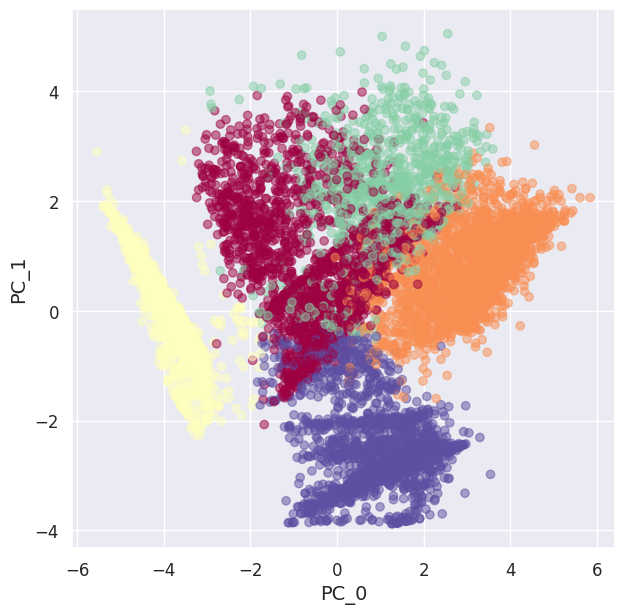

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cred[:,0],reduced_cred[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [ ]:
cluster_df_5=pd.concat([cred_original[selected_variables],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [ ]:
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[selected_variables].mean()).T

Cluster_5                          0            1            2            3  \
PURCHASES_TRX               7.096670    34.587759     0.032196    27.703746   
Monthly_avg_purchase       68.917645   210.536468     0.086126   141.584086   
Monthly_cash_advance       74.517541     4.040708   185.038534   249.942101   
limit_usage                 0.377959     0.258931     0.576110     0.600096   
CASH_ADVANCE_TRX            2.697637     0.152757     6.448823    10.384790   
payment_minpay              5.562287     8.675499     9.963172     3.651686   
both_oneoff_installment     0.002148     1.000000     0.000000     0.900114   
installment                 0.000000     0.000000     0.015858     0.088536   
one_off                     0.997852     0.000000     0.002883     0.011351   
none                        0.000000     0.000000     0.981259     0.000000   
CREDIT_LIMIT             4497.951209  5722.970627  4046.692295  5873.041998   

Cluster_5                          4  
PURCHASES_TRX              11.905537  
Monthly_avg_purchase       47.369817  
Monthly_cash_advance       20.636870  
limit_usage                 0.250011  
CASH_ADVANCE_TRX            0.550489  
payment_minpay             13.783426  
both_oneoff_installment     0.000000  
installment                 1.000000  
one_off                     0.000000  
none                        0.000000  
CREDIT_LIMIT             3228.949923

In [ ]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5  Cluster_5
0          0            1862
1          1            1977
2          2            2081
3          3             881
4          4            2149
Name: count, dtype: int64


In [ ]:
print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1862   20.804469
1  1977   22.089385
2  2081   23.251397
3   881    9.843575
4  2149   24.011173


In [ ]:
km_6=KMeans(n_clusters=6).fit(reduced_cred)
km_6.labels_

array([2, 1, 4, 4, 4, 2, 3, 2, 3, 4, 2, 4, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0,
       2, 0, 1, 2, 5, 2, 0, 2, 0, 3, 5, 4, 2, 1, 1, 0, 5, 5, 1, 0, 4, 1,
       3, 0, 2, 1, 3, 5, 0, 3, 1, 4, 2, 4, 5, 3, 1, 2, 4, 4, 1, 4, 2, 3,
       1, 1, 3, 4, 2, 0, 1, 3, 3, 3, 4, 2, 1, 5, 3, 1, 3, 2, 3, 4, 0, 0,
       5, 1, 0, 0, 5, 4, 4, 1, 4, 1, 2, 1, 4, 2, 3, 2, 1, 5, 2, 1, 0, 0,
       3, 1, 0, 1, 3, 3, 2, 1, 2, 1, 0, 4, 2, 1, 1, 4, 1, 3, 5, 1, 4, 3,
       2, 5, 2, 3, 3, 0, 3, 5, 3, 1, 1, 3, 3, 4, 2, 4, 3, 3, 2, 3, 2, 0,
       3, 2, 0, 1, 3, 5, 1, 1, 3, 3, 2, 1, 2, 3, 2, 3, 1, 0, 2, 1, 0, 1,
       5, 1, 3, 2, 3, 2, 0, 4, 3, 2, 2, 3, 5, 5, 4, 4, 4, 2, 4, 3, 3, 3,
       4, 1, 4, 0, 2, 0, 3, 2, 5, 0, 0, 3, 0, 3, 1, 4, 2, 2, 0, 3, 0, 3,
       3, 3, 4, 3, 4, 4, 3, 3, 1, 3, 3, 2, 4, 4, 3, 4, 2, 3, 2, 3, 5, 3,
       3, 4, 3, 2, 3, 2, 0, 3, 5, 2, 2, 4, 1, 2, 4, 0, 2, 1, 4, 3, 3, 0,
       3, 3, 3, 4, 4, 3, 3, 5, 3, 3, 0, 4, 5, 4, 2, 3, 3, 2, 3, 3, 1, 1,
       1, 0, 4, 1, 3, 0, 4, 1, 2, 3, 5, 1, 4, 4, 5,

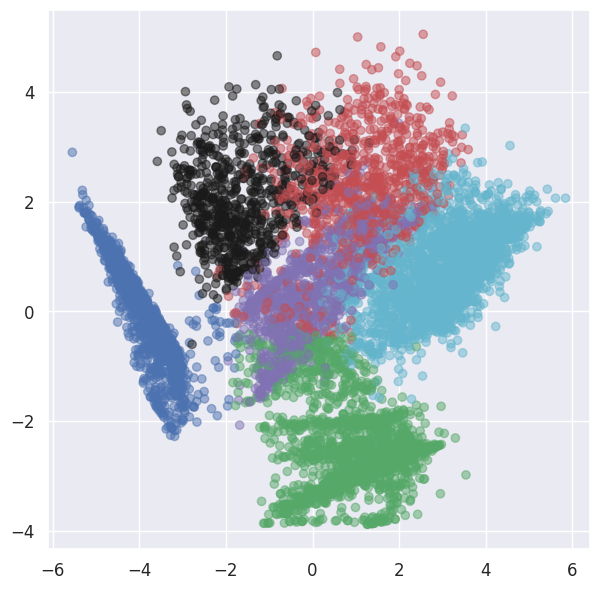

In [ ]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cred[:,0],reduced_cred[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [ ]:
cluster_df_6 = pd.concat([cred_original[selected_variables],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [ ]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[selected_variables].mean()).T
six_cluster

Cluster_6                          0            1            2            3  \
PURCHASES_TRX              27.919908     0.030347    11.905537    34.663789   
Monthly_avg_purchase      140.374727     0.088891    47.369817   211.196582   
Monthly_cash_advance      242.856971   184.829434    20.636870     4.027720   
limit_usage                 0.600654     0.575724     0.250011     0.258206   
CASH_ADVANCE_TRX           10.000000     6.434971     0.550489     0.150838   
payment_minpay              3.616973     9.976487    13.783426     8.702974   
both_oneoff_installment     0.911899     0.000000     0.000000     1.000000   
installment                 0.088101     0.016378     1.000000     0.000000   
one_off                     0.000000     0.000000     0.000000     0.000000   
none                        0.000000     0.983622     0.000000     0.000000   
CREDIT_LIMIT             5834.610984  4047.527296  3228.949923  5735.293514   

Cluster_6                          4            5  
PURCHASES_TRX               7.760575     5.967143  
Monthly_avg_purchase       78.585295    54.091602  
Monthly_cash_advance        3.603272   205.502536  
limit_usage                 0.245772     0.605930  
CASH_ADVANCE_TRX            0.125212     7.642857  
payment_minpay              6.911822     3.257979  
both_oneoff_installment     0.006768     0.000000  
installment                 0.000000     0.000000  
one_off                     0.993232     1.000000  
none                        0.000000     0.000000  
CREDIT_LIMIT             4471.701020  4577.649351

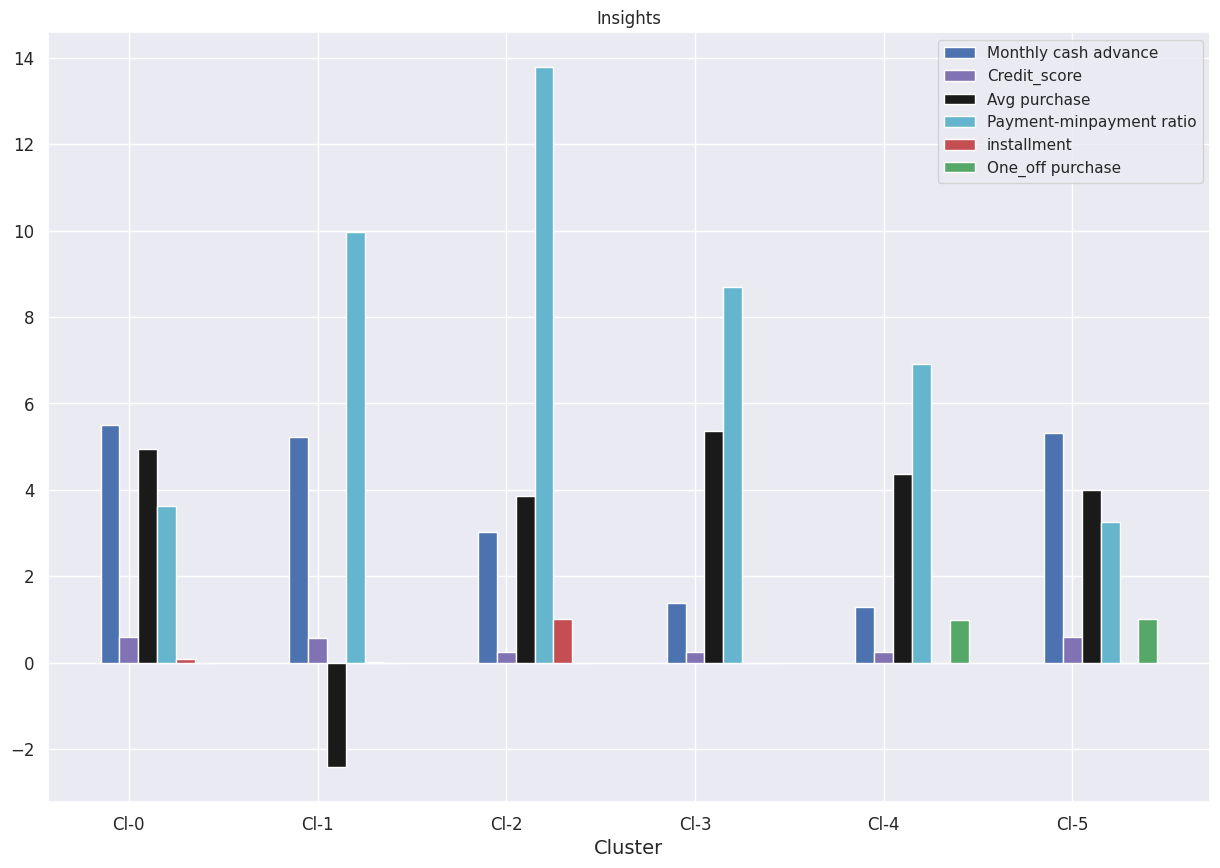

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

index = np.arange(len(six_cluster.columns))

cash_advance = np.log(six_cluster.loc['Monthly_cash_advance', :].values)
credit_score = six_cluster.loc['limit_usage', :].values
purchase = np.log(six_cluster.loc['Monthly_avg_purchase', :].values)
payment = six_cluster.loc['payment_minpay', :].values
installment = six_cluster.loc['installment', :].values
one_off = six_cluster.loc['one_off', :].values

bar_width = 0.10
b1 = ax.bar(index, cash_advance, color='b', label='Monthly cash advance', width=bar_width)
b2 = ax.bar(index + bar_width, credit_score, color='m', label='Credit_score', width=bar_width)
b3 = ax.bar(index + 2 * bar_width, purchase, color='k', label='Avg purchase', width=bar_width)
b4 = ax.bar(index + 3 * bar_width, payment, color='c', label='Payment-minpayment ratio', width=bar_width)
b5 = ax.bar(index + 4 * bar_width, installment, color='r', label='installment', width=bar_width)
b6 = ax.bar(index + 5 * bar_width, one_off, color='g', label='One_off purchase', width=bar_width)

ax.set_xlabel("Cluster")
ax.set_title("Insights")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5'))

ax.legend()
plt.show()


In [ ]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([5.492, 5.219, 3.027, 1.393, 1.282, 5.325])

In [ ]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cred)
    score_c[n]=calinski_harabasz_score(reduced_cred,km_score.labels_)
    score[n]=silhouette_score(reduced_cred,km_score.labels_)

<Axes: >

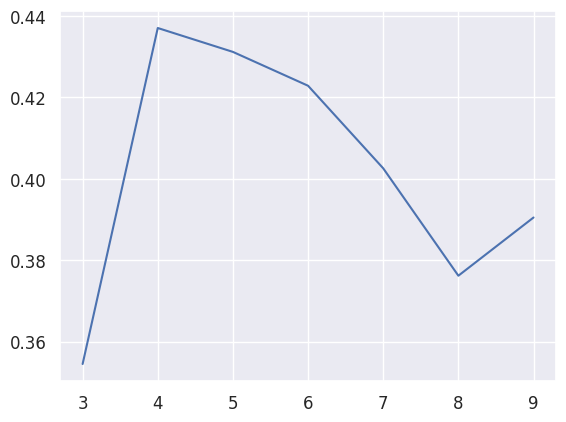

In [ ]:
pd.Series(score).plot()

<Axes: >

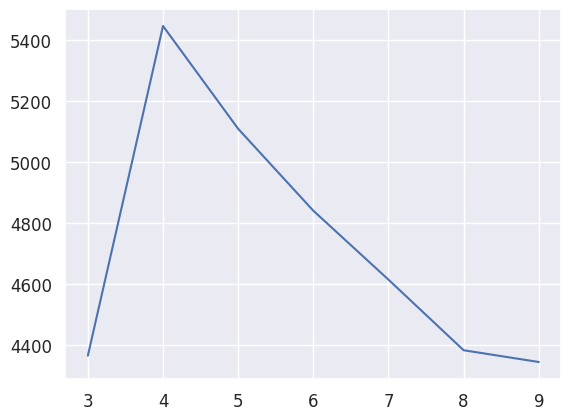

In [ ]:
pd.Series(score_c).plot()